<a href="https://colab.research.google.com/github/syh0397/Statistics_python/blob/main/6_Anova_test_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANOVA

### **Anova란 ?**

- Analysis of variance = 분산분석 !
- 두개 이상의 평균을 비교할때 사용한다. 
- 두개라고 했지만 두개에는 잘 안쓰고 세개에 주로 사용한다.

#### 그럼 T - test를 두번 하면 되는거 아닌가 ? 

- 물론 가능하다 
- 하지만, P-value (그런데 그일이 실제로 일어났습니다!)의 범위가 중복으로 두번이나 추가된다
- 1종오류를 범할 확률이 처음에는 0.04라서 귀무가설을 기각하더라도 
- 한번 더하게 되면 0.08이 되어서 귀무가설을 기각하지 못하는 꼴이 된다.
- 그렇기 때문에 아노바 테스트를 사용한다!


#### 그럼 왜 분산 분석이라고 해놓고 평균을 사용하는가 ? 

- 일단 Anova test 의 공식은 아래와 같다

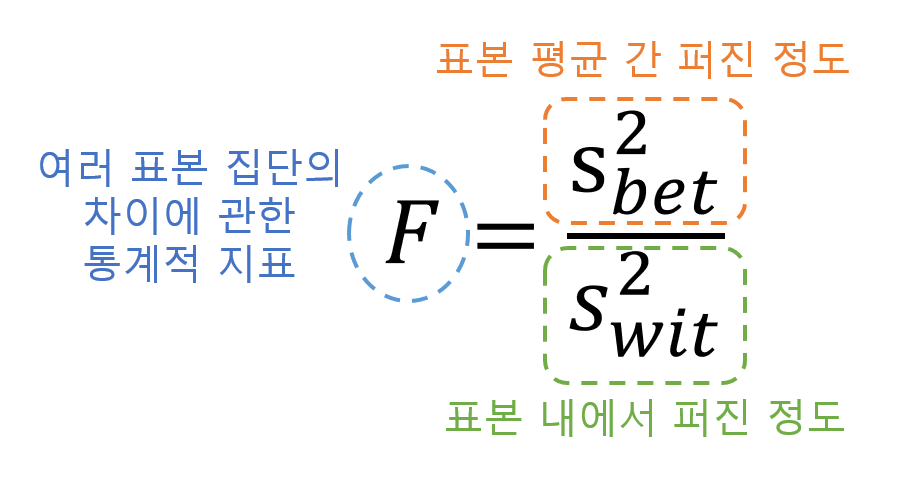

- F값을 구하는데 (F = 표본 평균 간 변동/표본 내 변동) , F 명칭이 중요한건 아니고, 표본 내에서 퍼진 정도 분의 표본 평균간 퍼진 정도이다 
- 이게 무슨말이냐면, 표본 평균간 퍼진 정도가 표본내에서 퍼진 정도보다 유의미하게 크다면 ? 차이가 있다고 볼수 있다는 말이다. 
---

- 표본내에서 퍼진정도 => 이걸 집단이라고 유의미 하게 볼 수 있는가?
- 표본 평균간 퍼진정도 => 집단끼리 얼마나 다르냐 ? 

---

- 그럼 왜 평균을 쓰느냐 
- 분산이 0 이라면 => 데이터가 하나만 있다면 ? (데이터가 퍼진 정도가 없다면)=> 평균이 하나인데 분산도 없다 ? 
- 평균을 통해서 데이터가 얼마나 퍼져있는지 볼 수 있기 때문이다. 

---

1. 근데 평균이 늘 아래 그림처럼 정규분포는 아니지 않나 ? => 그럼 평균으로부터 데이터가 얼마나 퍼졌는지 알 수 있나?
2. 그래서 정규성을 띄는지 먼저 테스트 해보아야 한다. 
3. 그것을 '정규성 검증' 이라고 하고 검정전 사전 test라고 생각하면 된다.
4. t-test또한 정규성이 확보되어야 한다. 
5. 데이터의 분포는 표본수 n이 30이 넘어가게 되면 대부분 정규성을 따르는데 꼭 그렇지만은 않으니 정규성을 확인해볼것 ! 

## **정규성 검정 종류**

**1. Shaprio-Wilks test**

- 표본수(n)가 2000 미만인 데이터셋에 적합한 정규성 검정
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

**2. Kolmogorove-Smirnov test**

- 표본수(n)가 2000 초과인 데이터셋에 적합한 정규성 검정
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

**3. Quantile-Quantile plot (Graphic test)**

- 데이터셋이 정규분포를 따르는지 시각적으로 판단하는 분석 방법
- 데이터 종류가 적다면, QQplot을 통해 시각적으로 가장 간단하며 직관적이다.
- https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/

**정규성 검정의 H0, H1**

-귀무가설(H0) : 데이터셋이 정규분포를 따른다.
-대립가설(H1) : 데이터셋이 정규분포를 따르지 않는다.

-귀무가설을 기각하고 대립가설이 채택된다면 (p<0.01 or 0.05) 해당 데이터셋은 정규분포를 따르지 않는 것이다.

## One Way Anova test 

- by using seaborn taxis data

In [ ]:
import pandas as pd 
import numpy as np 

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import sklearn 
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import scipy 
from scipy import  stats

In [ ]:
df = sns.load_dataset('taxis')
df
# df.drop(, axis=1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


Kolmogorove-Smirnov test

In [ ]:
fare = df['fare']
stats.kstest(fare, 'norm')

KstestResult(statistic=0.9936348862053913, pvalue=0.0)

In [ ]:
stats.shapiro(fare)

(0.6848875284194946, 0.0)

<Figure size 720x360 with 0 Axes>

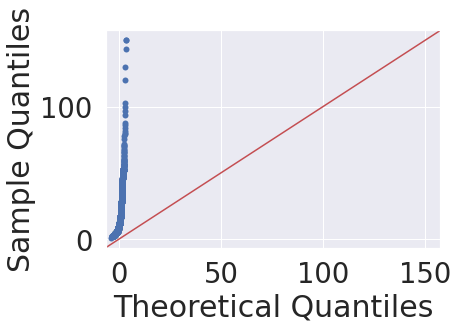

In [ ]:
import statsmodels.api as sm
import pylab as py

fig = plt.figure(figsize=(10,5))
sm.qqplot(fare, line ='45')
py.show()

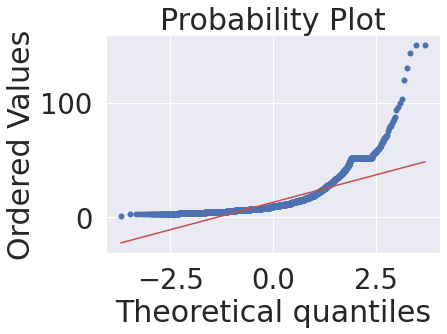

In [ ]:
from scipy.stats import probplot
plt.figure()
probplot(fare, plot = plt)
plt.show()

P-value가 0.05보다 작으므로 귀무가설 기각 => 정규분포를 따르지 않는다. 

In [ ]:
distance = df['distance']
stats.shapiro(fare)

(0.6848875284194946, 0.0)

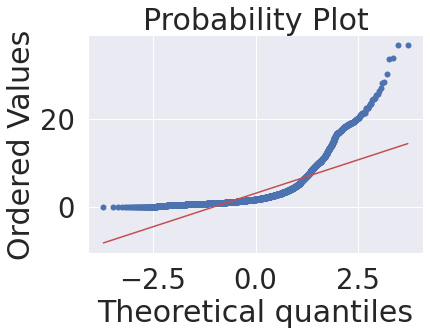

In [ ]:
plt.figure()
probplot(distance, plot = plt)
plt.show()

뭐야 이것도 안따라온다고 ??? 

In [ ]:
def Normality_taxis(x):
  df = sns.load_dataset('taxis')
  Key = df[x]
  print(stats.shapiro(Key))
  plt.figure()
  probplot(Key, plot = plt)
  return plt.show()

(0.6941935420036316, 0.0)


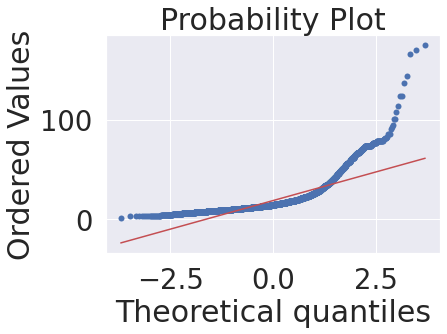

In [ ]:
Normality_taxis('total')